# Лабораторная 1
### Степановский Михаил, Лопатин Михаил




## Задание 1
### Реализуем методы нахождения производной при фиксированном значении шага:

In [126]:
import numpy as np


def right_derivation(f, x_values, step):
    ans = []
    for x in x_values:
        ans.append((f(x + step) - f(x)) / step)
    return ans


def left_derivation(f, x_values, step):
    ans = []
    for x in x_values:
        ans.append((f(x) - f(x - step)) / step)
    return ans


def central_derivation(f, x_values, step):
    ans = [(-3 * f(x_values[0]) + (4 * f(x_values[1])) - f(x_values[2])) / (2 * step)]
    for x in x_values[1:-1]:
        ans.append((f(x) - f(x - step)) / step)
    ans.append((f(x_values[-3]) - (4 * f(x_values[-2])) + (3 * f(x_values[-1]))) / (2 * step))
    return ans

### Возьмём две функции $f(x)=x^2$ и $f(x)=x^3$. Построим графики их аналитически выведенной производной, а также вычиленных значений численной производной в узлах сетки.

In [127]:
def cube_func(x):
    return x ** 3


def sqr_func(x):
    return x ** 2


def cube_derivative(x):
    return 3 * (x ** 2)


def sqr_derivative(x):
    return 2 * x

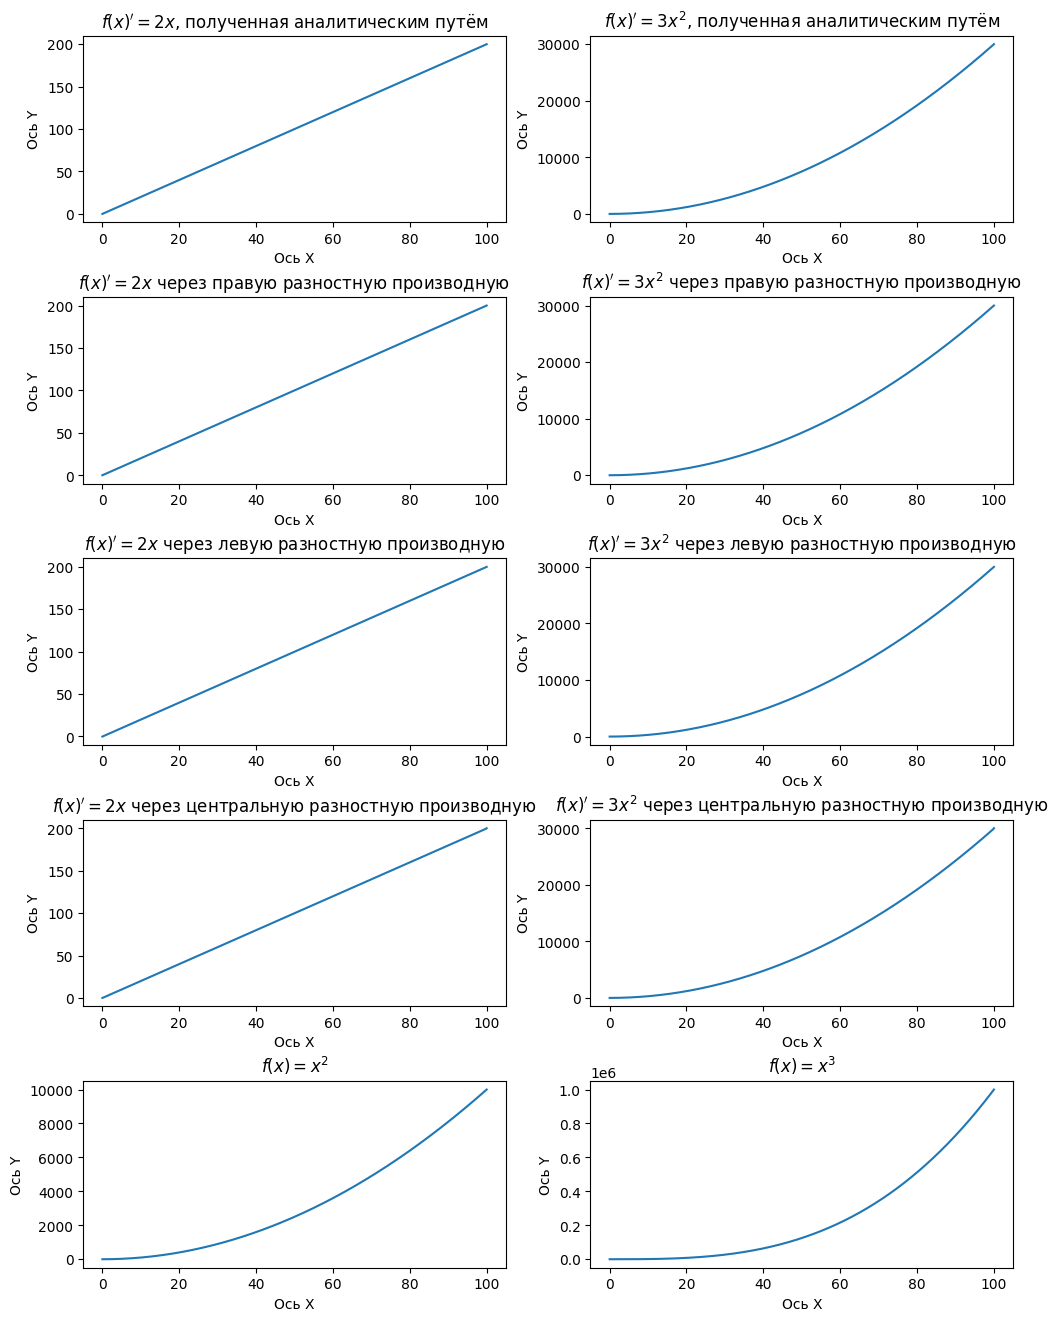

In [128]:
import matplotlib.pyplot as plt

h = 0.1
a = 0
b = 100
n = round((b - a) / h)
x_line = np.linspace(a, b, n)

fig, axs = plt.subplots(5, 2)
fig.set_figheight(16)
fig.set_figwidth(12)
fig.subplots_adjust(hspace=0.4)

axs[0][0].plot(x_line, sqr_derivative(x_line))
axs[0][0].set_title(r"$f(x)'=2x$, полученная аналитическим путём")

axs[1][0].plot(x_line, right_derivation(sqr_func, x_line, h))
axs[1][0].set_title(r"$f(x)'=2x$ через правую разностную производную")

axs[2][0].plot(x_line, left_derivation(sqr_func, x_line, h))
axs[2][0].set_title(r"$f(x)'=2x$ через левую разностную производную")

axs[3][0].plot(x_line, central_derivation(sqr_func, x_line, h))
axs[3][0].set_title(r"$f(x)'=2x$ через центральную разностную производную")

axs[0][1].plot(x_line, cube_derivative(x_line))
axs[0][1].set_title(r"$f(x)'=3x^2$, полученная аналитическим путём")

axs[1][1].plot(x_line, right_derivation(cube_func, x_line, h))
axs[1][1].set_title(r"$f(x)'=3x^2$ через правую разностную производную")

axs[2][1].plot(x_line, left_derivation(cube_func, x_line, h))
axs[2][1].set_title(r"$f(x)'=3x^2$ через левую разностную производную")

axs[3][1].plot(x_line, central_derivation(cube_func, x_line, h))
axs[3][1].set_title(r"$f(x)'=3x^2$ через центральную разностную производную")

axs[4][0].plot(x_line, sqr_func(x_line))
axs[4][0].set_title(r"$f(x)=x^2$")

axs[4][1].plot(x_line, cube_func(x_line))
axs[4][1].set_title(r"$f(x)=x^3$")

for i in range(5):
    for j in range(2):
        axs[i][j].set_xlabel("Ось X")
        axs[i][j].set_ylabel("Ось Y")

plt.show()


#### Найдём среднеквадратичное отклонение

In [129]:
def RMSE(numerical_values, true_values):
    differences = numerical_values - true_values
    return np.sqrt((differences ** 2).mean())


print(r"СКО для производных для квадратичной функции:")
print("СКО для правой разностной производной:",
      "%.10f" % RMSE(right_derivation(sqr_func, x_line, h), sqr_derivative(x_line)))
print("СКО для левой разностной производной:",
      "%.10f" % RMSE(left_derivation(sqr_func, x_line, h), sqr_derivative(x_line)))
print("СКО для центральной разностной производной:",
      "%.10f" % RMSE(central_derivation(sqr_func, x_line, h), sqr_derivative(x_line)))


СКО для производных для квадратичной функции:
СКО для правой разностной производной: 0.1000000000
СКО для левой разностной производной: 0.1000000000
СКО для центральной разностной производной: 0.1001003503


In [130]:
print(r"СКО для производных для кубической функции:")
print("СКО для правой разностной производной:",
      "%.10f" % RMSE(right_derivation(cube_func, x_line, h), cube_derivative(x_line)))
print("СКО для левой разностной производной:",
      "%.10f" % RMSE(left_derivation(cube_func, x_line, h), cube_derivative(x_line)))
print("СКО для центральной разностной производной:",
      "%.10f" % RMSE(central_derivation(cube_func, x_line, h), cube_derivative(x_line)))

СКО для производных для кубической функции:
СКО для правой разностной производной: 17.3335008042
СКО для левой разностной производной: 17.3161846309
СКО для центральной разностной производной: 17.3162192371


In [132]:
h_values = [h / 2**i for i in range(5)]
rmse_values =